<a href="https://colab.research.google.com/github/nuruzzaman99/Artificial-Intelligence/blob/main/Skin_lession_classification_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

#import data from drive

In [2]:
if not os.path.exists("./release_v0-20210711T044822Z-001.zip?dl=0"):
  !wget https://www.dropbox.com/s/7iyklsmv23ywr3p/release_v0-20210711T044822Z-001.zip?dl=0
  !unzip /content/release_v0-20210711T044822Z-001.zip?dl=0

else:
  print("The folder exsist")

The folder exsist


#Load data from CSV files

In [3]:
meta_data = pd.read_csv("/content/release_v0/meta/meta.csv")

test_index = pd.read_csv("/content/release_v0/meta/test_indexes.csv")
train_index = pd.read_csv("/content/release_v0/meta/train_indexes.csv")
valid_index = pd.read_csv("/content/release_v0/meta/valid_indexes.csv")

In [4]:
meta_data.head()

,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management,clinic,derm,case_id,notes
0,1,basal cell carcinoma,0,absent,absent,absent,absent,absent,absent,arborizing,medium,nodular,abdomen,female,excision,NEL/NEL025.JPG,NEL/Nel026.jpg,NaN,NaN
1,2,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,absent,low,palpable,head neck,female,excision,NEL/NEL027.JPG,NEL/Nel028.jpg,NaN,NaN
2,3,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,arborizing,medium,palpable,head neck,female,excision,NEL/Nel032.jpg,NEL/Nel033.jpg,NaN,NaN
3,4,basal cell carcinoma,4,absent,absent,absent,blue areas,irregular,present,within regression,low,palpable,lower limbs,male,excision,NEL/NEL034.JPG,NEL/Nel035.jpg,NaN,NaN
4,5,basal cell carcinoma,1,absent,absent,diffuse irregular,absent,absent,absent,absent,high,palpable,upper limbs,female,excision,NEL/NEL036.JPG,NEL/Nel037.jpg,NaN,NaN


#Rename column 'indexs' to 'case_num'

In [5]:
test_index.rename(index=str, columns={'indexes': 'case_num'}, inplace=True)
train_index.rename(index=str, columns={'indexes': 'case_num'}, inplace=True)
valid_index.rename(index=str, columns={'indexes': 'case_num'}, inplace=True)

#Separate data into Test, Train and Validation data by Case_num

In [6]:
test_data = pd.merge(meta_data, test_index , on = 'case_num')
train_data = pd.merge(meta_data, train_index , on = 'case_num')
valid_data = pd.merge(meta_data, valid_index , on = 'case_num')

In [7]:
test_data.head(3)

,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management,clinic,derm,case_id,notes
0,3,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,arborizing,medium,palpable,head neck,female,excision,NEL/Nel032.jpg,NEL/Nel033.jpg,NaN,NaN
1,6,basal cell carcinoma,1,absent,absent,diffuse irregular,absent,absent,absent,absent,high,palpable,head neck,female,excision,NEL/Nel038.jpg,NEL/Nel039.jpg,NaN,NaN
2,8,basal cell carcinoma,4,absent,absent,diffuse irregular,absent,irregular,present,absent,high,nodular,head neck,male,excision,NEL/Nel084.jpg,NEL/Nel085.jpg,NaN,NaN


In [8]:
train_data.head(3)

,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management,clinic,derm,case_id,notes
0,2,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,absent,low,palpable,head neck,female,excision,NEL/NEL027.JPG,NEL/Nel028.jpg,NaN,NaN
1,4,basal cell carcinoma,4,absent,absent,absent,blue areas,irregular,present,within regression,low,palpable,lower limbs,male,excision,NEL/NEL034.JPG,NEL/Nel035.jpg,NaN,NaN
2,7,basal cell carcinoma,0,absent,absent,absent,absent,absent,absent,arborizing,high,nodular,back,male,excision,NEL/Nel040.jpg,NEL/Nel041.jpg,NaN,NaN


In [9]:
valid_data.head(3)

,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management,clinic,derm,case_id,notes
0,1,basal cell carcinoma,0,absent,absent,absent,absent,absent,absent,arborizing,medium,nodular,abdomen,female,excision,NEL/NEL025.JPG,NEL/Nel026.jpg,NaN,NaN
1,5,basal cell carcinoma,1,absent,absent,diffuse irregular,absent,absent,absent,absent,high,palpable,upper limbs,female,excision,NEL/NEL036.JPG,NEL/Nel037.jpg,NaN,NaN
2,11,basal cell carcinoma,3,absent,absent,absent,absent,irregular,present,arborizing,medium,nodular,head neck,female,excision,NEL/NEL090.JPG,NEL/Nel091.jpg,NaN,NaN


In [10]:
train_data.shape[0]

412

In [11]:
test_data['clinic'][0]

'NEL/Nel032.jpg'

#Create X for model 
image + gender will be our X.

In [12]:
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import cv2

#test data

In [13]:
im_size = (400, 400)

In [14]:
X_test_clinic = []
for i in tqdm(range(test_data.shape[0])):
  images_path = 'release_v0/images/'+test_data['clinic'][i]
  test_clinic_img = cv2.imread(images_path)
  test_clinic_img = cv2.resize(test_clinic_img, (im_size), interpolation = cv2.INTER_AREA)
  X_test_clinic.append(test_clinic_img)

  0%|          | 0/395 [00:00<?, ?it/s]

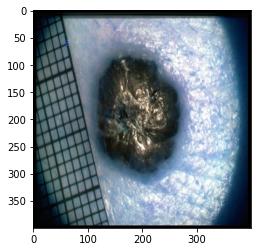

In [15]:
plt.imshow(X_test_clinic[2])

In [16]:
X_test_clinic = np.array(X_test_clinic)
print(X_test_clinic.shape)

(395, 400, 400, 3)


#Train data

In [17]:
X_train_clinic = []
for i in tqdm(range(train_data.shape[0])):
  images_path = 'release_v0/images/'+train_data['clinic'][i]
  train_clinic_img = cv2.imread(images_path)
  train_clinic_img = cv2.resize(train_clinic_img, (im_size), interpolation = cv2.INTER_AREA)
  X_train_clinic.append(train_clinic_img)

  0%|          | 0/412 [00:00<?, ?it/s]

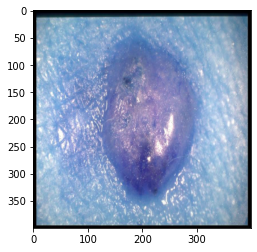

In [18]:
plt.imshow(X_train_clinic[2])

In [19]:
X_train_clinic = np.array(X_train_clinic)
print(X_train_clinic.shape)

(412, 400, 400, 3)


#Validation data

In [20]:
X_valid_clinic = []
for i in tqdm(range(valid_data.shape[0])):
  images_path = 'release_v0/images/'+valid_data['clinic'][i]
  valid_clinic_img = cv2.imread(images_path)
  valid_clinic_img = cv2.resize(valid_clinic_img, (im_size), interpolation = cv2.INTER_AREA)
  X_valid_clinic.append(valid_clinic_img)

  0%|          | 0/203 [00:00<?, ?it/s]

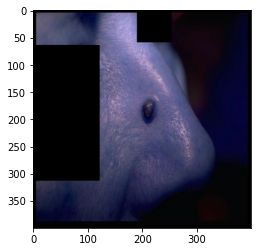

In [21]:
plt.imshow(X_valid_clinic[2])

In [22]:
X_valid_clinic = np.array(X_valid_clinic)
print(X_valid_clinic.shape)

(203, 400, 400, 3)


#Normalize image array

In [23]:
X_test_clinic = X_test_clinic / 255.0
X_train_clinic = X_train_clinic / 255.0
X_valid_clinic = X_valid_clinic / 255.0

#Make dummy variables
#Male 1 Female 0

In [24]:
gender = pd.get_dummies(test_data.sex)
gender = gender.drop(['female'], axis = 'columns')
gender.shape

(395, 1)

In [25]:
gender.head()

,male
0,0
1,0
2,1
3,0
4,0


In [26]:
gender = np.array(gender)

#Marge image and gender

In [27]:
#X_test = np.concatenate((X_test_clinic, gender.T), axis=1)
#X_test.shape

#Create Y for model

In [28]:
Y_test_clinic = test_data.drop(['case_num', 'seven_point_score', 'case_id', 'notes', 'clinic', 'derm'], axis = 1)
Y_train_clinic = train_data.drop(['case_num', 'seven_point_score', 'case_id', 'notes', 'clinic', 'derm'], axis = 1)
Y_valid_clinic = valid_data.drop(['case_num', 'seven_point_score', 'case_id', 'notes', 'clinic', 'derm'], axis = 1)

In [29]:
Y_test_clinic.head()

,diagnosis,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management
0,basal cell carcinoma,absent,absent,absent,absent,irregular,absent,arborizing,medium,palpable,head neck,female,excision
1,basal cell carcinoma,absent,absent,diffuse irregular,absent,absent,absent,absent,high,palpable,head neck,female,excision
2,basal cell carcinoma,absent,absent,diffuse irregular,absent,irregular,present,absent,high,nodular,head neck,male,excision
3,basal cell carcinoma,absent,absent,diffuse irregular,absent,irregular,absent,arborizing,low,palpable,head neck,female,excision
4,basal cell carcinoma,absent,absent,diffuse irregular,white areas,absent,absent,absent,low,palpable,head neck,female,excision


#One hot encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical, plot_model

In [31]:
label_encoder = LabelEncoder()

DIAG = label_encoder.fit_transform(Y_test_clinic['diagnosis'])
DIAG = to_categorical(DIAG)

PN = label_encoder.fit_transform(Y_test_clinic['pigment_network'])
PN = to_categorical(PN)

ST = label_encoder.fit_transform(Y_test_clinic['streaks'])
ST = to_categorical(ST)

PIG = label_encoder.fit_transform(Y_test_clinic['pigmentation'])
PIG = to_categorical(PIG)

RES = label_encoder.fit_transform(Y_test_clinic['regression_structures'])
RES = to_categorical(RES)

DG = label_encoder.fit_transform(Y_test_clinic['dots_and_globules'])
DG = to_categorical(DG)

BWV = label_encoder.fit_transform(Y_test_clinic['blue_whitish_veil'])
BWV = to_categorical(BWV)

VS = label_encoder.fit_transform(Y_test_clinic['vascular_structures'])
VS = to_categorical(VS)

LDD = label_encoder.fit_transform(Y_test_clinic['level_of_diagnostic_difficulty'])
LDD = to_categorical(LDD)

EVA = label_encoder.fit_transform(Y_test_clinic['elevation'])
EVA = to_categorical(EVA)

LOC = label_encoder.fit_transform(Y_test_clinic['location'])
LOC = to_categorical(LOC)

SEX = label_encoder.fit_transform(Y_test_clinic['sex'])
SEX = to_categorical(SEX)

MNG = label_encoder.fit_transform(Y_test_clinic['management'])
MNG = to_categorical(MNG)

print(DIAG.shape)
print(PN.shape)
print(ST.shape)
print(PIG.shape)
print(RES.shape)

print(DG.shape)
print(BWV.shape)
print(VS.shape)
print(LDD.shape)
print(EVA.shape)

print(LOC.shape)
print(SEX.shape)
print(MNG.shape)

(395, 19)
(395, 3)
(395, 3)
(395, 5)
(395, 4)
(395, 3)
(395, 2)
(395, 8)
(395, 3)
(395, 3)
(395, 9)
(395, 2)
(395, 3)


#Join all categorical array

In [32]:
Y_test_clinic = np.hstack([DIAG, PN, ST, PIG, RES, DG, BWV, VS, LDD, EVA, LOC, SEX, MNG])

In [33]:
Y_test_clinic.shape

(395, 67)

In [34]:
DIAG = label_encoder.fit_transform(Y_train_clinic['diagnosis'])
DIAG = to_categorical(DIAG)

PN = label_encoder.fit_transform(Y_train_clinic['pigment_network'])
PN = to_categorical(PN)

ST = label_encoder.fit_transform(Y_train_clinic['streaks'])
ST = to_categorical(ST)

PIG = label_encoder.fit_transform(Y_train_clinic['pigmentation'])
PIG = to_categorical(PIG)

RES = label_encoder.fit_transform(Y_train_clinic['regression_structures'])
RES = to_categorical(RES)

DG = label_encoder.fit_transform(Y_train_clinic['dots_and_globules'])
DG = to_categorical(DG)

BWV = label_encoder.fit_transform(Y_train_clinic['blue_whitish_veil'])
BWV = to_categorical(BWV)

VS = label_encoder.fit_transform(Y_train_clinic['vascular_structures'])
VS = to_categorical(VS)

LDD = label_encoder.fit_transform(Y_train_clinic['level_of_diagnostic_difficulty'])
LDD = to_categorical(LDD)

EVA = label_encoder.fit_transform(Y_train_clinic['elevation'])
EVA = to_categorical(EVA)

LOC = label_encoder.fit_transform(Y_train_clinic['location'])
LOC = to_categorical(LOC)

SEX = label_encoder.fit_transform(Y_train_clinic['sex'])
SEX = to_categorical(SEX)

MNG = label_encoder.fit_transform(Y_train_clinic['management'])
MNG = to_categorical(MNG)

print(DIAG.shape)
print(PN.shape)
print(ST.shape)
print(PIG.shape)
print(RES.shape)

print(DG.shape)
print(BWV.shape)
print(VS.shape)
print(LDD.shape)
print(EVA.shape)

print(LOC.shape)
print(SEX.shape)
print(MNG.shape)


(412, 19)
(412, 3)
(412, 3)
(412, 5)
(412, 4)
(412, 3)
(412, 2)
(412, 8)
(412, 3)
(412, 3)
(412, 9)
(412, 2)
(412, 3)


In [35]:
Y_train_clinic = np.hstack([DIAG, PN, ST, PIG, RES, DG, BWV, VS, LDD, EVA, LOC, SEX, MNG])

In [36]:
Y_train_clinic.shape

(412, 67)

In [37]:
DIAG = label_encoder.fit_transform(Y_valid_clinic['diagnosis'])
DIAG = to_categorical(DIAG)

PN = label_encoder.fit_transform(Y_valid_clinic['pigment_network'])
PN = to_categorical(PN)

ST = label_encoder.fit_transform(Y_valid_clinic['streaks'])
ST = to_categorical(ST)

PIG = label_encoder.fit_transform(Y_valid_clinic['pigmentation'])
PIG = to_categorical(PIG)

RES = label_encoder.fit_transform(Y_valid_clinic['regression_structures'])
RES = to_categorical(RES)

DG = label_encoder.fit_transform(Y_valid_clinic['dots_and_globules'])
DG = to_categorical(DG)

BWV = label_encoder.fit_transform(Y_valid_clinic['blue_whitish_veil'])
BWV = to_categorical(BWV)

VS = label_encoder.fit_transform(Y_valid_clinic['vascular_structures'])
VS = to_categorical(VS)

LDD = label_encoder.fit_transform(Y_valid_clinic['level_of_diagnostic_difficulty'])
LDD = to_categorical(LDD)

EVA = label_encoder.fit_transform(Y_valid_clinic['elevation'])
EVA = to_categorical(EVA)

LOC = label_encoder.fit_transform(Y_valid_clinic['location'])
LOC = to_categorical(LOC)

SEX = label_encoder.fit_transform(Y_valid_clinic['sex'])
SEX = to_categorical(SEX)

MNG = label_encoder.fit_transform(Y_valid_clinic['management'])
MNG = to_categorical(MNG)

print(DIAG.shape)
print(PN.shape)
print(ST.shape)
print(PIG.shape)
print(RES.shape)

print(DG.shape)
print(BWV.shape)
print(VS.shape)
print(LDD.shape)
print(EVA.shape)

print(LOC.shape)
print(SEX.shape)
print(MNG.shape)


(203, 19)
(203, 3)
(203, 3)
(203, 4)
(203, 4)
(203, 3)
(203, 2)
(203, 7)
(203, 3)
(203, 3)
(203, 9)
(203, 2)
(203, 3)


In [38]:
Y_valid_clinic = np.hstack([DIAG, PN, ST, PIG, RES, DG, BWV, VS, LDD, EVA, LOC, SEX, MNG])

In [39]:
Y_valid_clinic.shape

(203, 65)

In [59]:
Y_valid_clinic

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [40]:
#vs = pd.get_dummies(meta_data.vascular_structures)
#vs.head()

In [41]:
#Create lebel
'''
print(test_data.head(3))
test_data_lebel = test_data.drop(['case_num', 'seven_point_score', 'case_id', 'notes', 'clinic', 'derm'], axis = 1)
print(test_data_lebel.head(3))'''

"\nprint(test_data.head(3))\ntest_data_lebel = test_data.drop(['case_num', 'seven_point_score', 'case_id', 'notes', 'clinic', 'derm'], axis = 1)\nprint(test_data_lebel.head(3))"

#Join 2 database by columns

In [42]:
'''marge = pd.concat([meta_data, pn], axis = 'columns')
marge.head()'''

"marge = pd.concat([meta_data, pn], axis = 'columns')\nmarge.head()"

#Drop columns by column name

In [43]:
'''D_cols = marge.drop(['case_num', 'pigment_network', 'case_id', 'notes'], axis = 'columns')
D_cols.head()'''

"D_cols = marge.drop(['case_num', 'pigment_network', 'case_id', 'notes'], axis = 'columns')\nD_cols.head()"

#One hot encoding

In [44]:
'''from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical, plot_model'''

'from sklearn.preprocessing import LabelEncoder\nfrom sklearn.preprocessing import OneHotEncoder\nfrom tensorflow.keras.utils import to_categorical, plot_model'

In [45]:
'''label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)

y_train_hc = to_categorical(integer_encoded, num_classes = 3)

#print(y_train_hc)'''

'label_encoder = LabelEncoder()\ninteger_encoded = label_encoder.fit_transform(y_train)\n\ny_train_hc = to_categorical(integer_encoded, num_classes = 3)\n\n#print(y_train_hc)'

In [46]:
'''label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_test)

y_test_hc = to_categorical(integer_encoded, num_classes = 3)

#print(y_test_hc)'''

'label_encoder = LabelEncoder()\ninteger_encoded = label_encoder.fit_transform(y_test)\n\ny_test_hc = to_categorical(integer_encoded, num_classes = 3)\n\n#print(y_test_hc)'

In [47]:
'''label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_valid)

y_valid_hc = to_categorical(integer_encoded, num_classes = 3)

#print(y_valid_hc)'''

'label_encoder = LabelEncoder()\ninteger_encoded = label_encoder.fit_transform(y_valid)\n\ny_valid_hc = to_categorical(integer_encoded, num_classes = 3)\n\n#print(y_valid_hc)'

#Define loss function

In [48]:
import tensorflow as tf
import math

In [49]:
def my_loss(y_true, y_pred):
  ts = 1.0
  err = tf.abs(y_true - y_pred)
  is_sml_err = err < ts
  sm_err = tf.square(err) / 2.0
  big_err = ts*(err -(0.5 * ts))
  return tf.where(is_sml_err, sm_err, big_err)

In [50]:
tf.keras.optimizers.Adam(learning_rate=0.0001, 
                         beta_1=0.9, 
                         beta_2=0.999, 
                         epsilon=1e-07, 
                         amsgrad = False, 
                         name='Adam')

#Build the model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from keras.layers import BatchNormalization

In [52]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(400, 400, 3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))

model.add(Dense(67, activation='softmax'))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 199, 199, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       7

In [54]:
model.compile(optimizer= 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
'''#earle stopping

from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor= "val_accuracy", min_delta= 0.01, 
                   patience = 5, verbose=1, mode='auto')

mc = ModelCheckpoint(monitor= "val_accuracy", filepath="./bestmodel", 
                     verbose=1, save_best_only=True, mode='auto')

cd = [es, mc]'''

'#earle stopping\n\nfrom keras.callbacks import ModelCheckpoint, EarlyStopping\n\nes = EarlyStopping(monitor= "val_accuracy", min_delta= 0.01, \n                   patience = 5, verbose=1, mode=\'auto\')\n\nmc = ModelCheckpoint(monitor= "val_accuracy", filepath="./bestmodel", \n                     verbose=1, save_best_only=True, mode=\'auto\')\n\ncd = [es, mc]'

In [56]:
history = model.fit(X_train_clinic, Y_train_clinic, 
                    epochs = 5,
                    validation_data = (X_test_clinic, Y_test_clinic))

Epoch 1/5
10/13 [======================>.......] - ETA: 30s - loss: 16010.6406 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

#Test the model